In [ ]:
# Basic Library
import os , sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [ ]:
os.getcwd()

'C:\\Users\\Lovekesh\\Desktop\\Python\\Stats And ML'

In [ ]:
dataset = pd.read_excel('Employee_Data.xls')

In [ ]:
dataset.head()

,Employee Id,First Name,Last Name,Department,Age,Experience,Salary
0,1,Joy,Bass,Sales and Marketing,28.0,3.0,32889
1,2,Sheila,Garza,Sales and Marketing,22.0,1.0,15944
2,3,John,Bryant,Customer Relations,22.0,1.0,40343
3,4,Christian,Farley,Customer Relations,22.0,1.0,19018
4,5,Colorado,Bowen,Accounting,27.0,0.0,24795


In [ ]:
mydata = dataset.copy()
mydata.head()

,Employee Id,First Name,Last Name,Department,Age,Experience,Salary
0,1,Joy,Bass,Sales and Marketing,28.0,3.0,32889
1,2,Sheila,Garza,Sales and Marketing,22.0,1.0,15944
2,3,John,Bryant,Customer Relations,22.0,1.0,40343
3,4,Christian,Farley,Customer Relations,22.0,1.0,19018
4,5,Colorado,Bowen,Accounting,27.0,0.0,24795


In [ ]:
# ques: How many data points and features we have?
print(dataset.shape)

(100, 7)


In [ ]:
# Q: What are the columns name given in our dataset?
print(dataset.columns)

Index(['Employee Id', 'First Name', 'Last Name', 'Department', 'Age',
       'Experience', 'Salary'],
      dtype='object')


In [ ]:
# Q: What are the datatype we have?
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Employee Id  100 non-null    int64  
 1   First Name   100 non-null    object 
 2   Last Name    100 non-null    object 
 3   Department   81 non-null     object 
 4   Age          82 non-null     float64
 5   Experience   90 non-null     float64
 6   Salary       100 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 5.6+ KB


In [ ]:
# Pre-processing
# part 1: Handling missing value
dataset.isnull().sum()/len(dataset)*100

Employee Id     0.0
First Name      0.0
Last Name       0.0
Department     19.0
Age            18.0
Experience     10.0
Salary          0.0
dtype: float64

In [ ]:
# Imputation is required in the missing variable
# Department is Object - Mode / most frequent occurence
# Age and Experience - Number
dataset['Department'].value_counts()

Sales and Marketing    30
Accounting             27
Customer Relations     24
Name: Department, dtype: int64

In [ ]:
dataset['Department'] = dataset['Department'].fillna('Sales and Marketing')

In [ ]:
dataset.isnull().sum()

Employee Id     0
First Name      0
Last Name       0
Department      0
Age            18
Experience     10
Salary          0
dtype: int64

In [ ]:
dataset['Department'].value_counts()

Sales and Marketing    49
Accounting             27
Customer Relations     24
Name: Department, dtype: int64

<Axes: ylabel='Age'>

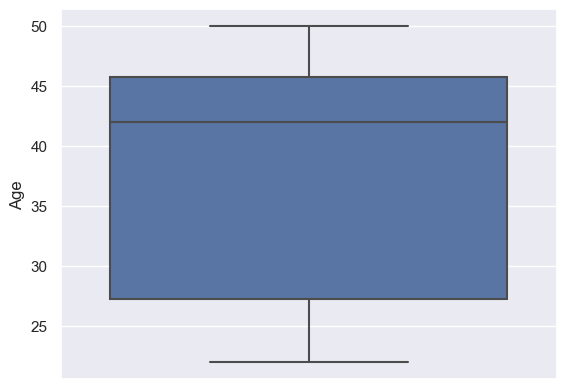

In [ ]:
# Age and Experience - Number
# mean and median - check outlier
# if outlier found then median and if no outlier then mean
# whiskers
sns.boxplot(y='Age', data=dataset)

<Axes: ylabel='Experience'>

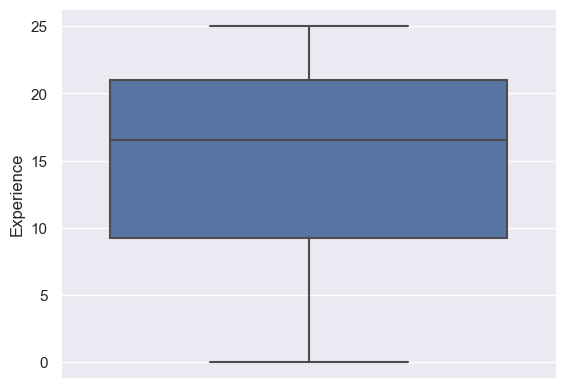

In [ ]:
sns.boxplot(y='Experience', data=dataset)

In [ ]:
dataset.describe()

,Employee Id,Age,Experience,Salary
count,100.000000,82.000000,90.000000,100.000000
mean,50.500000,37.975610,14.766667,65066.760000
std,29.011492,9.515388,6.889252,26189.874212
min,1.000000,22.000000,0.000000,11830.000000
25%,25.750000,27.250000,9.250000,48526.000000
50%,50.500000,42.000000,16.500000,73500.500000
75%,75.250000,45.750000,21.000000,86621.250000
max,100.000000,50.000000,25.000000,98180.000000


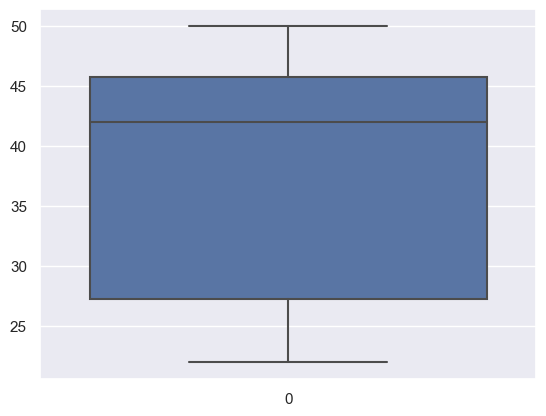

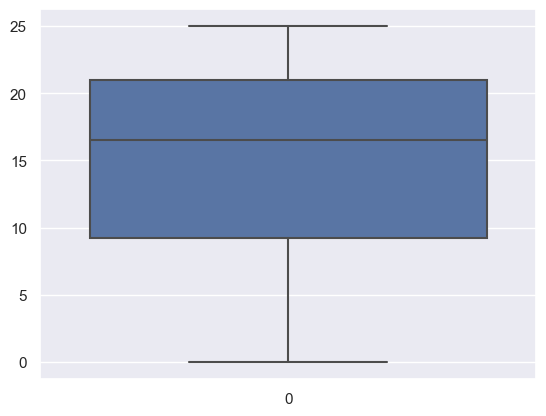

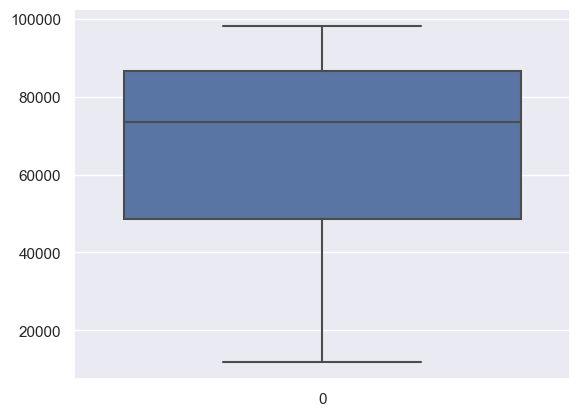

In [ ]:
# In case if we have more number of feature then
# get boxplot for all features with for loop
def boxplots(col):
    sns.boxplot(dataset[col])
    plt.show()

for i in list(dataset.select_dtypes(exclude=['object']).columns)[1:]:
    boxplots(i)

In [ ]:
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].mean())
dataset['Experience'] = dataset['Experience'].fillna(dataset['Experience'].mean())

In [ ]:
dataset.isnull().sum()

Employee Id    0
First Name     0
Last Name      0
Department     0
Age            0
Experience     0
Salary         0
dtype: int64

In [ ]:
mydata.isnull().sum()


Employee Id     0
First Name      0
Last Name       0
Department     19
Age            18
Experience     10
Salary          0
dtype: int64

In [ ]:
x = mydata.iloc[:,4:].values

In [ ]:
x

array([[2.8000e+01, 3.0000e+00, 3.2889e+04],
       [2.2000e+01, 1.0000e+00, 1.5944e+04],
       [2.2000e+01, 1.0000e+00, 4.0343e+04],
       [2.2000e+01, 1.0000e+00, 1.9018e+04],
       [2.7000e+01, 0.0000e+00, 2.4795e+04],
       [2.6000e+01, 5.0000e+00, 1.5387e+04],
       [2.4000e+01, 6.0000e+00, 3.4117e+04],
       [2.9000e+01, 2.0000e+00, 1.6099e+04],
       [2.9000e+01, 5.0000e+00, 4.2105e+04],
       [3.0000e+01, 6.0000e+00, 1.1891e+04],
       [2.6000e+01, 5.0000e+00, 3.4687e+04],
       [2.6000e+01, 6.0000e+00, 2.3549e+04],
       [2.4000e+01, 5.0000e+00, 2.9110e+04],
       [2.2000e+01, 2.0000e+00, 3.3435e+04],
       [2.5000e+01, 3.0000e+00, 1.1830e+04],
       [2.5000e+01,        nan, 4.4065e+04],
       [2.2000e+01,        nan, 1.3266e+04],
       [2.5000e+01,        nan, 1.6631e+04],
       [2.7000e+01,        nan, 2.9886e+04],
       [2.5000e+01,        nan, 3.0464e+04],
       [2.2000e+01,        nan, 1.4943e+04],
       [2.2000e+01,        nan, 1.8632e+04],
       [2.

In [ ]:
# using sklearn to handle missing value
from sklearn.impute import SimpleImputer
simple_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
x = simple_imputer.fit_transform(x)

In [ ]:
pd.DataFrame(x).isnull().sum()

0    0
1    0
2    0
dtype: int64

# Encoding

In [ ]:
dataset.head()

,Employee Id,First Name,Last Name,Department,Age,Experience,Salary
0,1,Joy,Bass,Sales and Marketing,28.0,3.0,32889
1,2,Sheila,Garza,Sales and Marketing,22.0,1.0,15944
2,3,John,Bryant,Customer Relations,22.0,1.0,40343
3,4,Christian,Farley,Customer Relations,22.0,1.0,19018
4,5,Colorado,Bowen,Accounting,27.0,0.0,24795


In [ ]:
dataset_1 = dataset.iloc[:,3:]

In [ ]:
dataset_1.head()

,Department,Age,Experience,Salary
0,Sales and Marketing,28.0,3.0,32889
1,Sales and Marketing,22.0,1.0,15944
2,Customer Relations,22.0,1.0,40343
3,Customer Relations,22.0,1.0,19018
4,Accounting,27.0,0.0,24795


In [ ]:
dataset_1.isnull().sum()

Department    0
Age           0
Experience    0
Salary        0
dtype: int64

In [ ]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Department  100 non-null    object 
 1   Age         100 non-null    float64
 2   Experience  100 non-null    float64
 3   Salary      100 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 3.3+ KB


In [ ]:
dataset_1['Department'].value_counts()

Sales and Marketing    49
Accounting             27
Customer Relations     24
Name: Department, dtype: int64

In [ ]:
# Label Encoder
dataset_1['Department'] = dataset_1['Department'].astype('category')
dataset_1['Department'] = dataset_1['Department'].cat.codes

In [ ]:
dataset_1.head(20)

,Department,Age,Experience,Salary
0,2,28.0,3.000000,32889
1,2,22.0,1.000000,15944
2,1,22.0,1.000000,40343
3,1,22.0,1.000000,19018
4,0,27.0,0.000000,24795
5,0,26.0,5.000000,15387
6,1,24.0,6.000000,34117
7,1,29.0,2.000000,16099
8,2,29.0,5.000000,42105
9,1,30.0,6.000000,11891


In [ ]:
# One Hot Encoder
dataset_1 = pd.get_dummies(dataset_1, columns=['Department'])

In [ ]:
dataset_1

,Age,Experience,Salary,Department_0,Department_1,Department_2
0,28.0,3.0,32889,0,0,1
1,22.0,1.0,15944,0,0,1
2,22.0,1.0,40343,0,1,0
3,22.0,1.0,19018,0,1,0
4,27.0,0.0,24795,1,0,0
...,...,...,...,...,...,...
95,47.0,22.0,79077,0,0,1
96,46.0,20.0,81187,0,0,1
97,44.0,18.0,83847,0,1,0
98,47.0,22.0,89158,0,1,0


In [ ]:
# Dummy variable
dataset_1 = dataset_1.drop(['Department_2'], axis=1)

In [ ]:
dataset_1.head()

,Age,Experience,Salary,Department_0,Department_1
0,28.0,3.0,32889,0,0
1,22.0,1.0,15944,0,0
2,22.0,1.0,40343,0,1
3,22.0,1.0,19018,0,1
4,27.0,0.0,24795,1,0


# Feature Scaling: standardization : - When there is an outlier in dataset. - when range is unknown. - It gives me +ve and -ve value. - It is by default method eg. Salary, Normalization: Known Range or no Outlier eg. Age


In [ ]:
# Standardization
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_fs_stand = sc_x.fit_transform(dataset_1)

In [ ]:
x_fs_stand

array([[-1.16485118e+00, -1.81044925e+00, -1.23482325e+00,
        -6.08163641e-01, -5.61951487e-01],
       [-1.86547071e+00, -2.11817433e+00, -1.88508853e+00,
        -6.08163641e-01, -5.61951487e-01],
       [-1.86547071e+00, -2.11817433e+00, -9.48775604e-01,
        -6.08163641e-01,  1.77951304e+00],
       [-1.86547071e+00, -2.11817433e+00, -1.76712361e+00,
        -6.08163641e-01,  1.77951304e+00],
       [-1.28162110e+00, -2.27203688e+00, -1.54543093e+00,
         1.64429429e+00, -5.61951487e-01],
       [-1.39839102e+00, -1.50272416e+00, -1.90646343e+00,
         1.64429429e+00, -5.61951487e-01],
       [-1.63193087e+00, -1.34886162e+00, -1.18769869e+00,
        -6.08163641e-01,  1.77951304e+00],
       [-1.04808125e+00, -1.96431179e+00, -1.87914039e+00,
        -6.08163641e-01,  1.77951304e+00],
       [-1.04808125e+00, -1.50272416e+00, -8.81158761e-01,
        -6.08163641e-01, -5.61951487e-01],
       [-9.31311332e-01, -1.34886162e+00, -2.04062262e+00,
        -6.08163641e-01

In [ ]:
# Normalization
from sklearn.preprocessing import Normalizer
x_nor = Normalizer()
x_fs_nor = x_nor.fit_transform(dataset_1)

In [ ]:
x_fs_nor

array([[8.51348163e-04, 9.12158746e-05, 9.99999633e-01, 0.00000000e+00,
        0.00000000e+00],
       [1.37982809e-03, 6.27194585e-05, 9.99999046e-01, 0.00000000e+00,
        0.00000000e+00],
       [5.45323767e-04, 2.47874439e-05, 9.99999851e-01, 0.00000000e+00,
        2.47874439e-05],
       [1.15679804e-03, 5.25817293e-05, 9.99999328e-01, 0.00000000e+00,
        5.25817293e-05],
       [1.08892857e-03, 0.00000000e+00, 9.99999406e-01, 4.03306879e-05,
        0.00000000e+00],
       [1.68973559e-03, 3.24949151e-04, 9.99998517e-01, 6.49898302e-05,
        0.00000000e+00],
       [7.03461432e-04, 1.75865358e-04, 9.99999737e-01, 0.00000000e+00,
        2.93108930e-05],
       [1.80135118e-03, 1.24231116e-04, 9.99998368e-01, 0.00000000e+00,
        6.21155580e-05],
       [6.88754136e-04, 1.18750713e-04, 9.99999756e-01, 0.00000000e+00,
        0.00000000e+00],
       [2.52290813e-03, 5.04581626e-04, 9.99996687e-01, 0.00000000e+00,
        8.40969377e-05],
       [7.49560135e-04, 1.4414